In [1]:
# import all the necessary libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the data for cleaning

african_df = pd.read_csv("africa_food_prices.csv")
african_df.tail(10)

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
956769,2050628,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,52,Rice - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,110.6250,NaN
956770,2050629,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,54,Maize meal - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,50.0000,NaN
956771,2050630,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,96,Oil (vegetable) - Retail,0.0,ZWL,15,Retail,15,L,6,2021,197.0000,NaN
956772,2050631,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,97,Sugar - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,118.3750,NaN
956773,2050632,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,185,Salt - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,71.0000,NaN
956774,2050633,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,233.3333,NaN
956775,2050634,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000,NaN
956776,2050635,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000,NaN
956777,2050636,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000,NaN
956778,2050637,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,887,Fish (kapenta) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,1200.0000,NaN


In [3]:
#african_df= pd.DataFrame(african_df)

# Data preparation and cleaning

In [4]:
# to know the size of the dataset working on
african_df.size

18178801

In [5]:
african_df.shape

(956779, 19)

In [6]:
african_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

In [7]:
african_df.nunique()

Unnamed: 0            956779
country_id                42
country                   42
state_id                 393
state                    311
market_id               1703
market                  1696
produce_id               389
produce                  457
currency_id                1
currency                  34
pt_id                      3
market_type                3
um_unit_id                81
quantity                  81
month                     12
year                      32
price                 108546
mp_commoditysource         0
dtype: int64

In [8]:
african_df.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [9]:
# Drop columns not needed in the analysis
african_df.drop(['Unnamed: 0','mp_commoditysource','state_id','market_id'],axis = 'columns' ,inplace = True)

# Dividing the countries to their subregions
Africa is divided into five different regions

* North africa
* Eastern Africa
* Central Africa
* Southern Africa
* Western Africa

In [10]:
# checking the different countries available
african_df.country.unique()

array(['Algeria', 'Angola', 'Benin', 'Burundi', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'Congo', 'Djibouti', 'Egypt',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Togo', 'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [11]:
# creating a list for countries in their different regions
north = ['Algeria','Egypt','Sudan','Morocco','Tunisia','Libya']
east = ['Burundi','Comoros','Djibouti','Eritrea','Ethiopia','Kenya','Madagascar','Malawi','Mauritius','Mozambique','Rwanda','Seychelles','Somalia','South Sudan','Uganda','Zambia','Zimbabwe']
central = ['Angola','Cameroon','Chad','Congo','Central African Republic','Equatorial Guinea','Gabon']
south = ['Botswana','Swaziland','Lesotho','Namibia','South Africa']
west = ['Benin','Burkina Faso','Cape Verde','Ivory Coast','Gambia','Ghana','Guinea','Guinea-Bissau','Liberia','Mali','Mauritania','Niger','Nigeria','Senegal','Togo','Sierra Leone']

In [12]:
# creating a funnction to applt it to each columns in the dataset
north = ['Algeria','Egypt','Sudan','Morocco','Tunisia','Libya']
east = ['Burundi','Comoros','Djibouti','Eritrea','Ethiopia','Kenya','Madagascar','Malawi','Mauritius','Mozambique','Rwanda','Seychelles','Somalia','South Sudan','Uganda','Zambia','Zimbabwe']
central = ['Angola','Cameroon','Chad','Congo','Central African Republic','Equatorial Guinea','Gabon']
south = ['Botswana','Swaziland','Lesotho','Namibia','South Africa']
west = ['Benin','Burkina Faso','Cape Verde','Ivory Coast','Gambia','Ghana','Guinea','Guinea-Bissau','Liberia','Mali','Mauritania','Niger','Nigeria','Senegal','Togo','Sierra Leone']
def region(reg):
    for i in north:
        if reg.country == i:
            return 'north africa'
    for i in east:
        if reg.country == i:
            return 'east africa'
    for i in central:
        if reg.country == i:
            return 'central africa'
    for i in south:
        if reg.country == i:
            return 'south africa'
    for i in west:
        if reg.country == i:
            return 'west africa'
    
    
african_df['region'] = african_df.apply(region,axis = 1)  

In [13]:
african_df

,country_id,country,state,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,region
0,4.0,Algeria,Alger,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0000,north africa
1,4.0,Algeria,Alger,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0000,north africa
2,4.0,Algeria,Alger,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0000,north africa
3,4.0,Algeria,Alger,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0000,north africa
4,4.0,Algeria,Alger,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0000,north africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956774,271.0,Zimbabwe,Midlands,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,233.3333,east africa
956775,271.0,Zimbabwe,Midlands,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000,east africa
956776,271.0,Zimbabwe,Midlands,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000,east africa
956777,271.0,Zimbabwe,Midlands,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000,east africa


In [14]:
grp_df=african_df.groupby('country')

In [15]:
grp_df.first()

,country_id,state,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,region
country,,,,,,,,,,,,,,,
Algeria,4.0,Alger,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0000,north africa
Angola,8.0,Luanda,Luanda,55,Bread - Retail,0.0,AOA,15,Retail,33,Unit,1,2008,35.2000,central africa
Benin,29.0,Alibori,Malanville (CBM),51,Maize - Wholesale,0.0,XOF,14,Wholesale,5,KG,1,2002,145.0000,west africa
Burundi,43.0,Bubanza,Musenyi,50,Beans - Retail,0.0,BIF,15,Retail,5,KG,10,2014,1244.6666,east africa
Cameroon,45.0,Adamaoua,Batoua Godolé,51,Maize - Wholesale,0.0,XAF,14,Wholesale,17,90 KG,1,2018,17500.0000,central africa
Cape Verde,47.0,Santiago,Santiago,58,Wheat flour - Retail,0.0,CVE,15,Retail,5,KG,1,2006,45.5000,west africa
Central African Republic,49.0,Bamingui-Bangoran,Ndélé,51,Maize - Retail,0.0,XAF,15,Retail,5,KG,11,2018,282.4320,central africa
Chad,50.0,None,National Average,64,Rice (imported) - Retail,0.0,XAF,15,Retail,5,KG,11,2018,567.0000,central africa
Congo,59.0,Bouenza,Nkayi,55,Bread - Retail,0.0,XAF,15,Retail,5,KG,1,2016,800.0000,central africa


# handling null values

In [16]:
african_df.isnull().values.any() # will tell us if there is null values


True

In [17]:
african_df.isnull().sum().sum() # it will give us the total null values in all the columns

126678

In [18]:
african_df['state'].fillna('No State',inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14352\3715553304.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  african_df['state'].fillna('No State',inplace = True)


In [19]:
african_df.isnull().any() # to confirm if we still have any null values

country_id     False
country        False
state          False
market         False
produce_id     False
produce        False
currency_id    False
currency       False
pt_id          False
market_type    False
um_unit_id     False
quantity       False
month          False
year           False
price          False
region         False
dtype: bool

In [20]:
african_df.country.unique() # Checking the different countries we have

array(['Algeria', 'Angola', 'Benin', 'Burundi', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'Congo', 'Djibouti', 'Egypt',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Togo', 'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [21]:
african_df.describe()

,country_id,produce_id,currency_id,pt_id,um_unit_id,month,year,price
count,956779.000000,956779.000000,956779.0,956779.000000,956779.000000,956779.000000,956779.000000,9.567790e+05
mean,1961.192782,186.141214,0.0,14.926716,14.017183,6.381471,2015.704015,4.128833e+03
std,10404.034922,165.401303,0.0,0.263570,24.437728,3.418025,4.603829,1.381840e+05
min,4.000000,50.000000,0.0,14.000000,5.000000,1.000000,1990.000000,0.000000e+00
25%,90.000000,67.000000,0.0,15.000000,5.000000,3.000000,2013.000000,6.500000e+01
50%,155.000000,105.000000,0.0,15.000000,5.000000,6.000000,2017.000000,2.505714e+02
75%,205.000000,262.000000,0.0,15.000000,9.000000,9.000000,2020.000000,7.221005e+02
max,70001.000000,887.000000,0.0,17.000000,175.000000,12.000000,2021.000000,1.725000e+07


In [22]:
african_df=african_df.rename(columns={'um_unit_id':'quantity',
                     'quantity':'Um_Unit_ID'})

# data visualization of the whole dataset

In [23]:
# Top 10 countries with the most record
top_10 = african_df.groupby('country').size().sort_values(ascending=False).head(6)
print(top_10)



country
Rwanda     137746
Mali        73843
Burundi     60921
Gambia      56971
Niger       54974
Nigeria     50285
dtype: int64


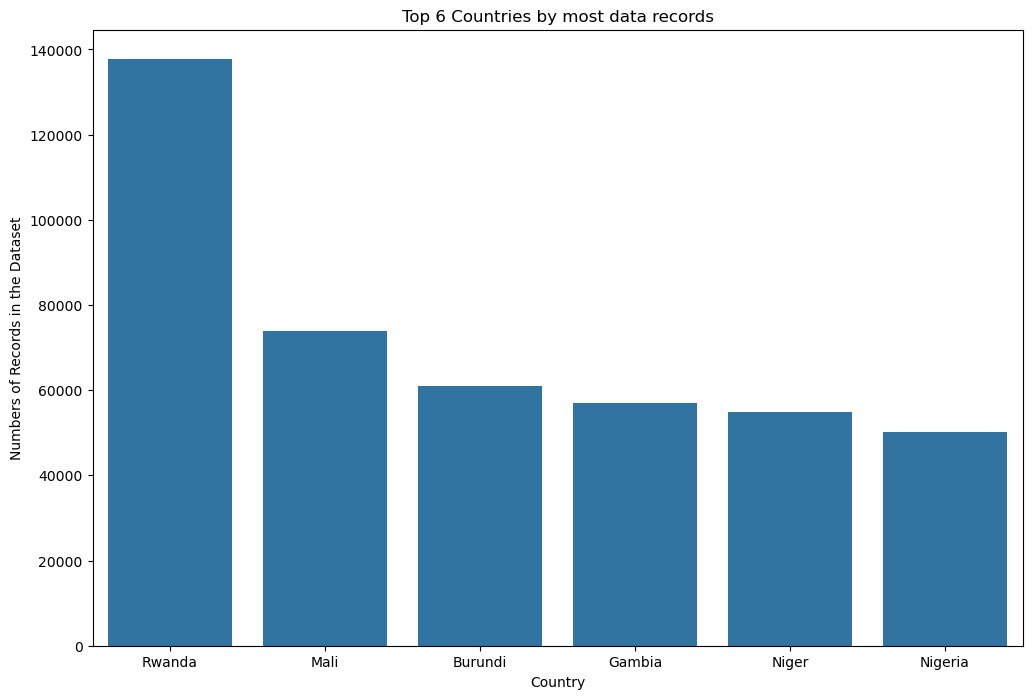

In [24]:
# this are the barplot of the top 10 countries 
plt.figure(figsize=(12,8))
sns.barplot(x = top_10.index,y=top_10.values)
plt.xlabel('Country')
plt.ylabel('Numbers of Records in the Dataset')
plt.title('Top 6 Countries by most data records');

Analyzing the box plot, it's evident that Rwanda stands out as the country with the highest frequency of market activities among all 42 countries in the dataset. Following closely, Mali takes the second spot in terms of market activity occurrence, with Burundi securing the third position. This observation suggests that Rwanda has a robust market landscape, followed by Mali and Burundi, showcasing their prominence in the dataset's market-related activities

In [25]:
# Top 20 most reported commodities
com_20 = african_df.groupby(['produce']).produce_id.count().sort_values(ascending = False).head()
com_20

produce
Millet - Retail             47476
Rice (imported) - Retail    47022
Sorghum - Retail            44679
Maize - Retail              43073
Maize (white) - Retail      33786
Name: produce_id, dtype: int64

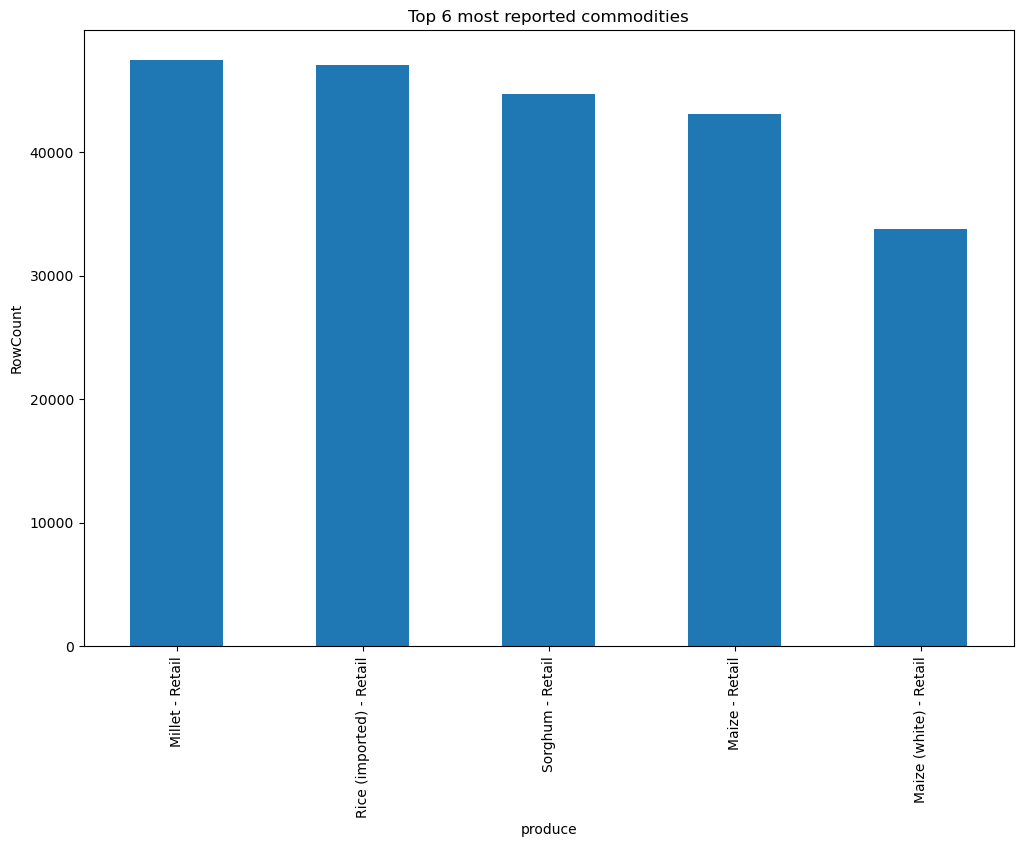

In [26]:
ax= com_20.plot(kind='bar', y = 'com_20.values',x ='com_20.index',    
    legend = False,figsize=(12,8), fontsize=10)
ax.set_title('Top 6 most reported commodities')
ax.set_xlabel("produce",fontsize=10)
ax.set_ylabel("RowCount",fontsize=10);

We can see from the visualization that 'Millet-Retail' is the most reported commodity in the dataset

# change the price of each currency to an equivalent of USD

In [27]:
df = african_df[["country","market","quantity", "currency","state", "month", "year", "price","region", "produce"]].copy()
df["cur_name"] = df["currency"]
df

,country,market,quantity,currency,state,month,year,price,region,produce,cur_name
0,Algeria,Algiers,5,DZD,Alger,4,2015,90.0000,north africa,Rice - Retail,DZD
1,Algeria,Algiers,5,DZD,Alger,5,2015,96.0000,north africa,Rice - Retail,DZD
2,Algeria,Algiers,5,DZD,Alger,6,2015,96.0000,north africa,Rice - Retail,DZD
3,Algeria,Algiers,5,DZD,Alger,7,2015,83.0000,north africa,Rice - Retail,DZD
4,Algeria,Algiers,5,DZD,Alger,8,2015,80.0000,north africa,Rice - Retail,DZD
...,...,...,...,...,...,...,...,...,...,...,...
956774,Zimbabwe,Mbilashaba,5,ZWL,Midlands,6,2021,233.3333,east africa,Beans (sugar) - Retail,ZWL
956775,Zimbabwe,Mbilashaba,116,ZWL,Midlands,6,2021,112.5000,east africa,Toothpaste - Retail,ZWL
956776,Zimbabwe,Mbilashaba,5,ZWL,Midlands,6,2021,114.0000,east africa,Laundry soap - Retail,ZWL
956777,Zimbabwe,Mbilashaba,66,ZWL,Midlands,6,2021,59.5000,east africa,Handwash soap - Retail,ZWL


In [28]:
df.loc[df['cur_name'] == 'RWF', 'cur_name'] = df.loc[df['cur_name'] == 'RWF']['price'] * 0.00100
df.loc[df['cur_name'] == 'BIF', 'cur_name'] = df.loc[df['cur_name'] == 'BIF']['price'] * 0.00050
df.loc[df['cur_name'] == 'GMD', 'cur_name'] = df.loc[df['cur_name'] == 'GMD']['price'] * 0.019
df.loc[df['cur_name'] == 'NGN', 'cur_name'] = df.loc[df['cur_name'] == 'NGN']['price'] * 0.0024
df.loc[df['cur_name'] == 'ZMW', 'cur_name'] = df.loc[df['cur_name'] == 'ZMW']['price'] * 0.055
df.loc[df['cur_name'] == 'MZN', 'cur_name'] = df.loc[df['cur_name'] == 'MZN']['price'] * 0.016
df.loc[df['cur_name'] == 'LYD', 'cur_name'] = df.loc[df['cur_name'] == 'LYD']['price'] * 0.22
df.loc[df['cur_name'] == 'GHS', 'cur_name'] = df.loc[df['cur_name'] == 'GHS']['price'] * 0.16
df.loc[df['cur_name'] == 'ETB', 'cur_name'] = df.loc[df['cur_name'] =='ETB']['price'] * 0.021
df.loc[df['cur_name'] == 'MWK', 'cur_name'] = df.loc[df['cur_name'] =='MWK']['price'] * 0.0012
df.loc[df['cur_name'] == 'SOS', 'cur_name'] = df.loc[df['cur_name'] =='SOS']['price'] * 0.0017
df.loc[df['cur_name'] == 'SSP', 'cur_name'] = df.loc[df['cur_name'] =='SSP']['price'] * 0.0076
df.loc[df['cur_name'] == 'LRD', 'cur_name'] = df.loc[df['cur_name'] =='LRD']['price'] * 0.0070
df.loc[df['cur_name'] == 'GNF', 'cur_name'] = df.loc[df['cur_name'] =='GNF']['price'] * 0.00011
df.loc[df['cur_name'] == 'SLL', 'cur_name'] = df.loc[df['cur_name'] == 'SLL']['price'] * 0.000091
df.loc[df['cur_name'] == 'MRO', 'cur_name'] = df.loc[df['cur_name'] == 'MRO']['price'] * 0.028
df.loc[df['cur_name'] == 'SDG', 'cur_name'] = df.loc[df['cur_name'] == 'SDG']['price'] * 0.74
df.loc[df['cur_name'] == 'LSL', 'cur_name'] = df.loc[df['cur_name'] == 'LSL']['price'] * 0.064
df.loc[df['cur_name'] == 'NAD', 'cur_name'] = df.loc[df['cur_name'] == 'NAD']['price'] * 0.063
df.loc[df['cur_name'] == 'KES', 'cur_name'] = df.loc[df['cur_name'] == 'KES']['price'] * 0.0089
df.loc[df['cur_name'] == 'UGX', 'cur_name'] = df.loc[df['cur_name'] == 'UGX']['price'] * 0.00028
df.loc[df['cur_name'] == 'ZWL', 'cur_name'] = df.loc[df['cur_name'] == 'ZWL']['price'] * 0.0027
df.loc[df['cur_name'] == 'SZL', 'cur_name'] = df.loc[df['cur_name'] == 'SZL']['price'] * 0.064
df.loc[df['cur_name'] == 'EGP', 'cur_name'] = df.loc[df['cur_name'] == 'EGP']['price'] * 0.064
df.loc[df['cur_name'] == 'CVE', 'cur_name'] = df.loc[df['cur_name'] == 'CVE']['price'] * 0.0103
df.loc[df['cur_name'] == 'DZD', 'cur_name'] = df.loc[df['cur_name'] == 'DZD']['price'] * 0.0072
df.loc[df['cur_name'] == 'AOA', 'cur_name'] = df.loc[df['cur_name'] == 'AOA']['price'] * 0.0017
df.loc[df['cur_name'] == 'ZAR', 'cur_name'] = df.loc[df['cur_name'] == 'ZAR']['price'] * 0.063
df.loc[df['cur_name'] == 'ERN', 'cur_name'] = df.loc[df['cur_name'] == 'ERN']['price'] * 0.066

In [29]:
df.head()

,country,market,quantity,currency,state,month,year,price,region,produce,cur_name
0,Algeria,Algiers,5,DZD,Alger,4,2015,90.0,north africa,Rice - Retail,0.648
1,Algeria,Algiers,5,DZD,Alger,5,2015,96.0,north africa,Rice - Retail,0.6912
2,Algeria,Algiers,5,DZD,Alger,6,2015,96.0,north africa,Rice - Retail,0.6912
3,Algeria,Algiers,5,DZD,Alger,7,2015,83.0,north africa,Rice - Retail,0.5976
4,Algeria,Algiers,5,DZD,Alger,8,2015,80.0,north africa,Rice - Retail,0.576


In [30]:
african_df.rename(columns= {"cur_name":"price_equiv"}, inplace=True)

In [31]:
#df1 will be our data frame to create charts for each country with the data sets it was provided.
df1 = df[["produce","currency","price","year","country","state","quantity","market","month","year","produce"]]

In [32]:
# country_prices = df.groupby('country')['cur_name'].mean().reset_index()
# print("Average food prices by country:")
# print(country_prices)
# Convert 'cur_name' column to numeric type
df['cur_name'] = pd.to_numeric(df['cur_name'], errors='coerce')

# Drop rows with NaN values in 'cur_name' column
df.dropna(subset=['cur_name'], inplace=True)

# Compute average food prices by country
country_prices = df.groupby('country')['cur_name'].mean().reset_index()

# Print average food prices by country
print("Average food prices by country:")
print(country_prices)


Average food prices by country:
         country    cur_name
0        Algeria    1.187726
1         Angola    1.766238
2        Burundi    1.258449
3     Cape Verde    0.898475
4          Egypt    1.234644
5        Eritrea  149.952000
6       Ethiopia   25.611617
7         Gambia    1.080418
8          Ghana   17.098519
9         Guinea    1.196723
10         Kenya   10.608373
11       Lesotho    2.134203
12       Liberia    8.915793
13         Libya    1.242368
14        Malawi    0.326391
15    Mauritania   67.753771
16    Mozambique    0.694566
17       Namibia    0.669512
18       Nigeria   11.848138
19        Rwanda    1.722505
20  Sierra Leone    1.111762
21       Somalia  192.010479
22  South Africa    0.139311
23   South Sudan   25.596820
24         Sudan  289.210099
25     Swaziland    1.352922
26        Uganda    0.534193
27        Zambia    0.450286
28      Zimbabwe    0.544846


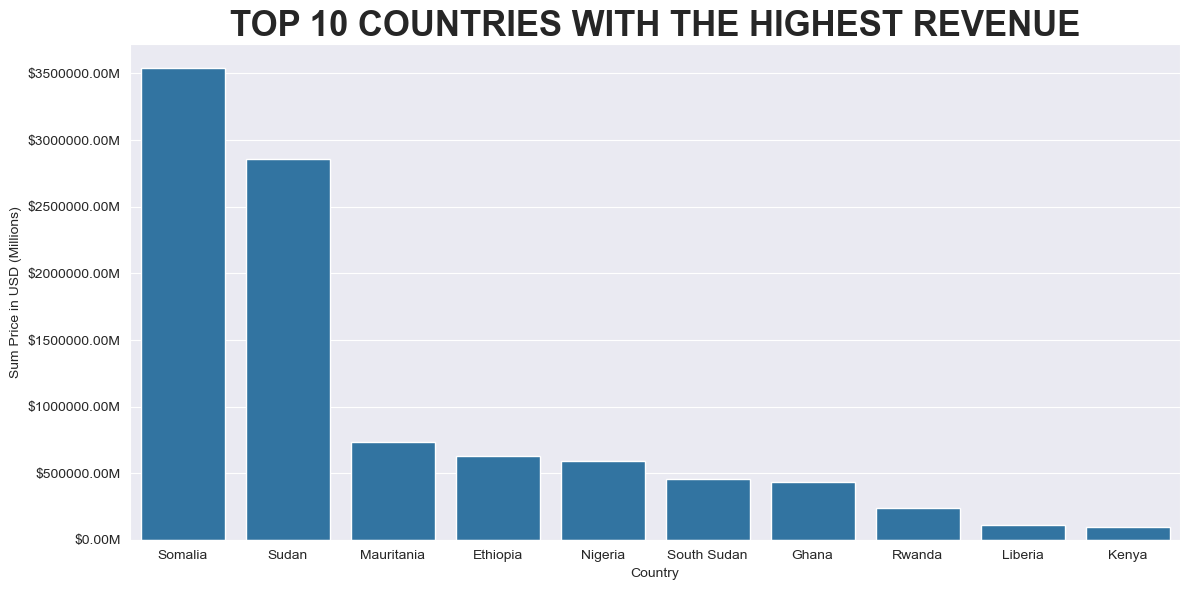

In [33]:
price_countries = df.groupby('country')['cur_name'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.barplot(x='country', y='cur_name', data=price_countries)

# Format the price axis to display in Millions
plt.gca().yaxis.set_major_formatter('${:.2f}M'.format)

# Adding labels and title
plt.ylabel('Sum Price in USD (Millions)')
plt.xlabel('Country')
plt.title('TOP 10 COUNTRIES WITH THE HIGHEST REVENUE', fontweight='bold', fontsize='25')

plt.tight_layout()
plt.show()


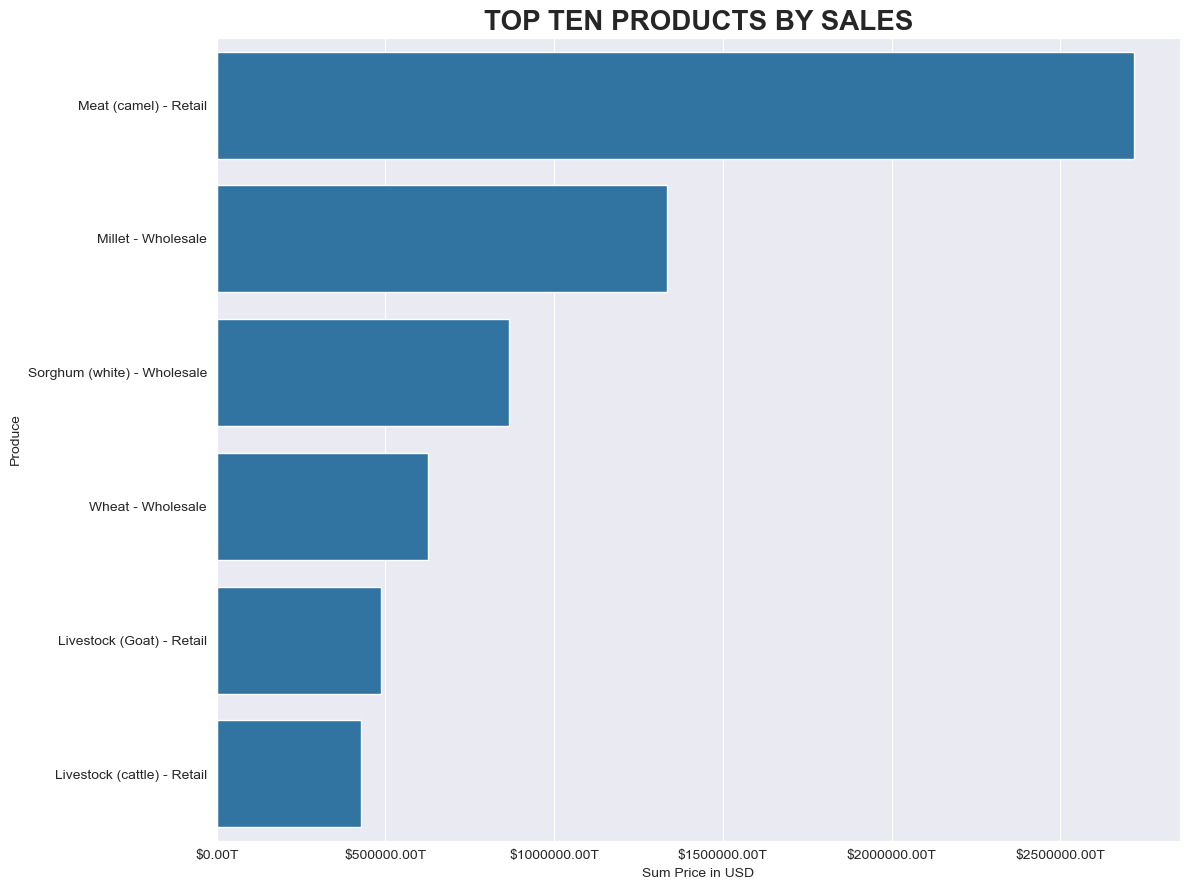

In [34]:
price_produce = df.groupby('produce')['cur_name'].sum().nlargest(6).reset_index()

plt.figure(figsize=(12, 9))
sns.set_style('darkgrid')
sns.barplot(y='produce', x='cur_name', data=price_produce)

# Format the price axis to display in Trillions
plt.gca().xaxis.set_major_formatter('${:.2f}T'.format)

plt.xlabel('Sum Price in USD')
plt.ylabel('Produce')
plt.title('TOP TEN PRODUCTS BY SALES', fontweight='bold', fontsize='20')

plt.tight_layout()
plt.show()


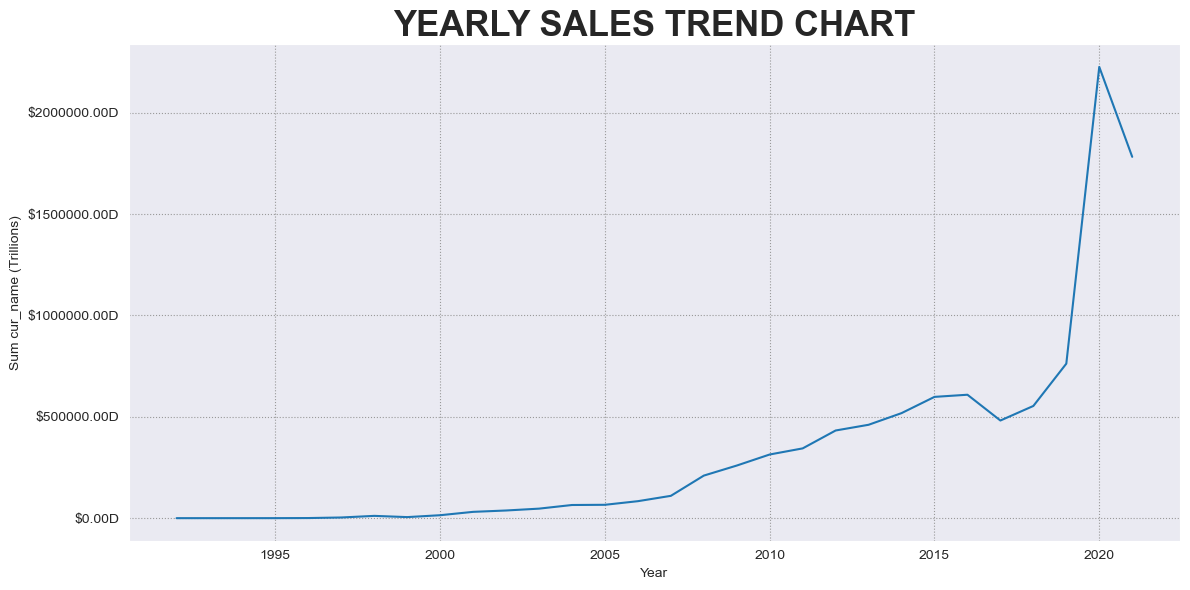

In [35]:
yearly_sales = df.groupby('year')['cur_name'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(x='year', y='cur_name', data=yearly_sales)

# Format the price axis to display in Trillions
plt.gca().yaxis.set_major_formatter('${:.2f}D'.format)

plt.xlabel('Year')
plt.ylabel('Sum cur_name (Trillions)')
plt.title('YEARLY SALES TREND CHART', fontweight='bold', fontsize='25')
plt.tight_layout()
plt.show()


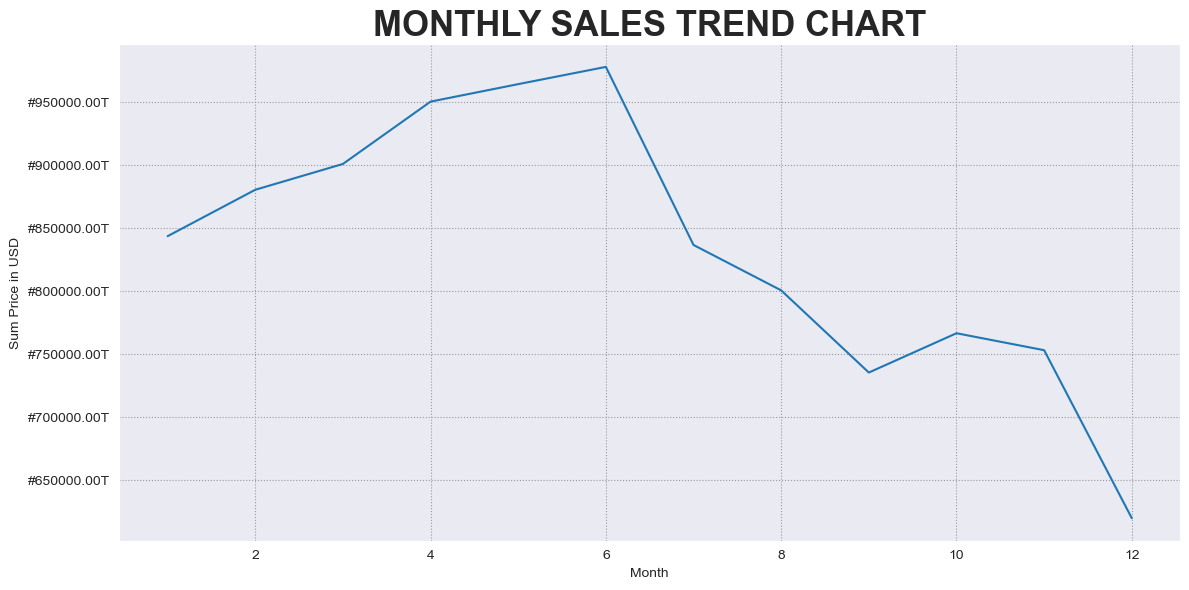

In [36]:
monthly_sales = df.groupby('month')['cur_name'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(x='month', y='cur_name', data=monthly_sales)

# Format the price axis to display in Trillions
plt.gca().yaxis.set_major_formatter('#{:.2f}T'.format)

plt.xlabel('Month')
plt.ylabel('Sum Price in USD')
plt.title('MONTHLY SALES TREND CHART', fontweight='bold', fontsize='25')
plt.tight_layout()
plt.show()


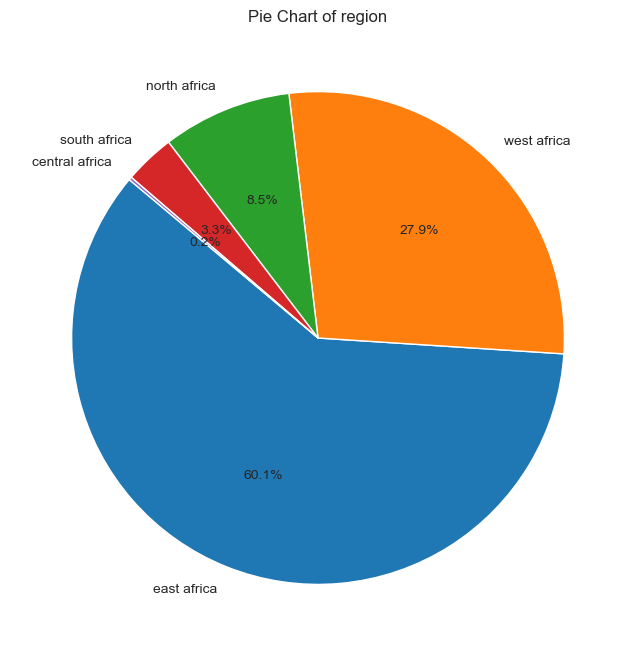

In [37]:
# Select the column you want to visualize
column_to_visualize = 'region'

# Count the occurrences of each category in the selected column
category_counts = df[column_to_visualize].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {column_to_visualize}')
plt.ylabel('')
plt.show()


In [38]:
african_df["quantity"].unique()

array([  5,  33,  15,  69,  28,  74,  75,  68, 105,  17, 169,  24, 175,
        87,  90,  51, 139,   9, 171, 122,  76,  22, 170,  99,  31, 102,
        56,  61,  95, 134,  63, 137,  79,  23,  80,  83,  21, 128,  20,
       143, 133, 141, 142, 145,  25, 115,  36,  37,  38,  27,  89, 121,
        66, 124, 119,  81, 116, 118, 120,  26, 136, 123,  60, 112, 155,
       158, 154,  52, 159,  71, 157, 161, 160,  47, 135, 113,  48,  57,
        45, 131, 111], dtype=int64)

In [39]:
african_df['price'].value_counts()

price
200.0000     17482
500.0000     15850
300.0000     14230
400.0000     13665
250.0000     12945
             ...  
120.8500         1
97.3675          1
90.2300          1
83.9050          1
1123.3333        1
Name: count, Length: 108546, dtype: int64

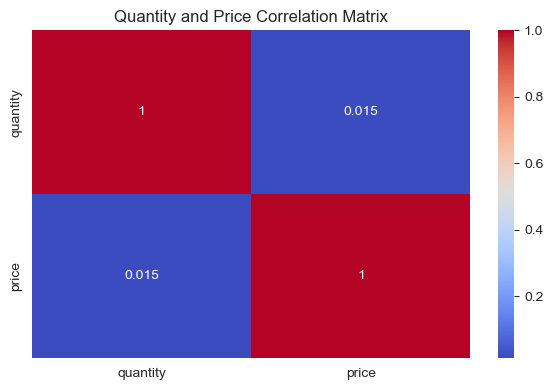

In [40]:
# Calculate the correlation
#correlation = df_corr['quantity'].corr(df_corr['price'])
#print("Correlation between quantity (in KG) and price:", correlation)

corr_matrix = african_df[['quantity', 'price']].corr()
# Plot the correlation matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Quantity and Price Correlation Matrix')
plt.tight_layout()
plt.show()

In [41]:
# Calculate sales revenue by country
african_df['Revenue'] = african_df['price'] * african_df['quantity']
revenue_by_country = african_df.groupby('country')['Revenue'].sum().nlargest(10)
revenue_by_country

country
Somalia        6.166089e+10
Mali           9.567138e+09
Chad           7.164972e+09
Rwanda         5.859777e+09
Cameroon       5.830231e+09
Nigeria        3.324014e+09
South Sudan    3.157267e+09
Mauritania     1.387465e+09
Burundi        8.959612e+08
Niger          8.618994e+08
Name: Revenue, dtype: float64

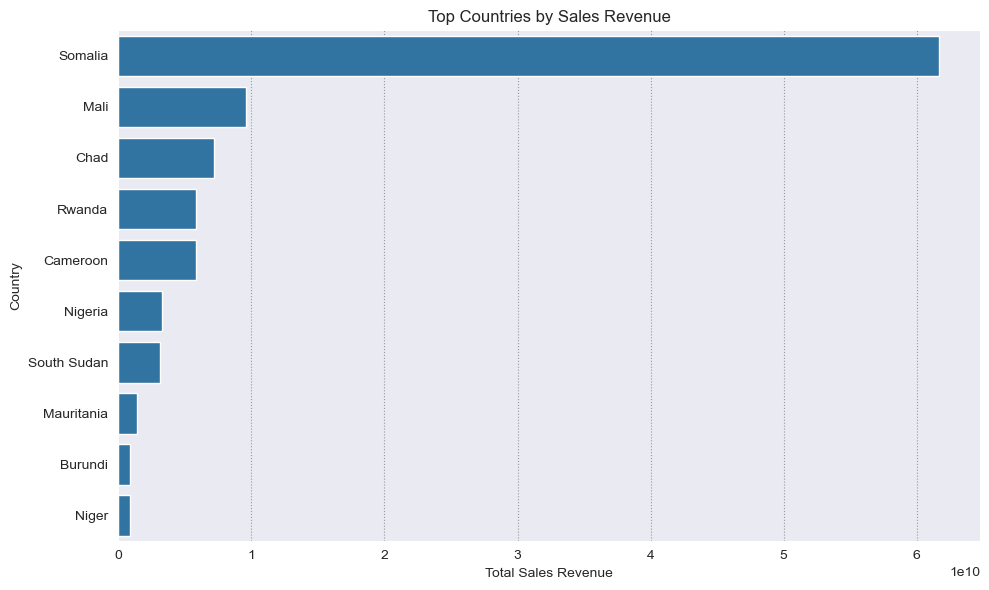

In [42]:
# Plot sales revenue by country
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_country.values, y=revenue_by_country.index)
plt.title('Top Countries by Sales Revenue')
plt.xlabel('Total Sales Revenue')
plt.ylabel('Country')
plt.tight_layout();

In this trend analysis, it becomes evident that Somalia emerges as the leader in terms of sales revenue among all countries. Following closely, Mali secures the second position, and Chad ranks third in this aspect. Interestingly, Rwanda, despite having the highest number of market activities, takes the fourth spot, while Nigeria, positioned at sixth place, maintains a consistent pattern between its ranking in the 'Top 10 African Countries With Most Market Activities' trend and its sales revenue position. This observation underscores the intricate interplay between market activities and sales revenue across these nations.

In [43]:
african_df.head()

,country_id,country,state,market,produce_id,produce,currency_id,currency,pt_id,market_type,quantity,Um_Unit_ID,month,year,price,region,Revenue
0,4.0,Algeria,Alger,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,north africa,450.0
1,4.0,Algeria,Alger,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,north africa,480.0
2,4.0,Algeria,Alger,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,north africa,480.0
3,4.0,Algeria,Alger,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,north africa,415.0
4,4.0,Algeria,Alger,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,north africa,400.0


In [44]:
african_df['year'].unique()

array([2015, 2016, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2017, 2018,
       2019, 2020, 2002, 2003, 2005, 2006, 2007, 2021, 2004, 2000, 2001,
       1994, 1995, 1996, 1997, 1998, 1999, 1992, 1993, 1990, 1991],
      dtype=int64)

In [45]:
start_year = 2009
end_year = 2020
filtered_df = african_df[(african_df['year'] >= start_year) & (african_df['year'] <= end_year)]

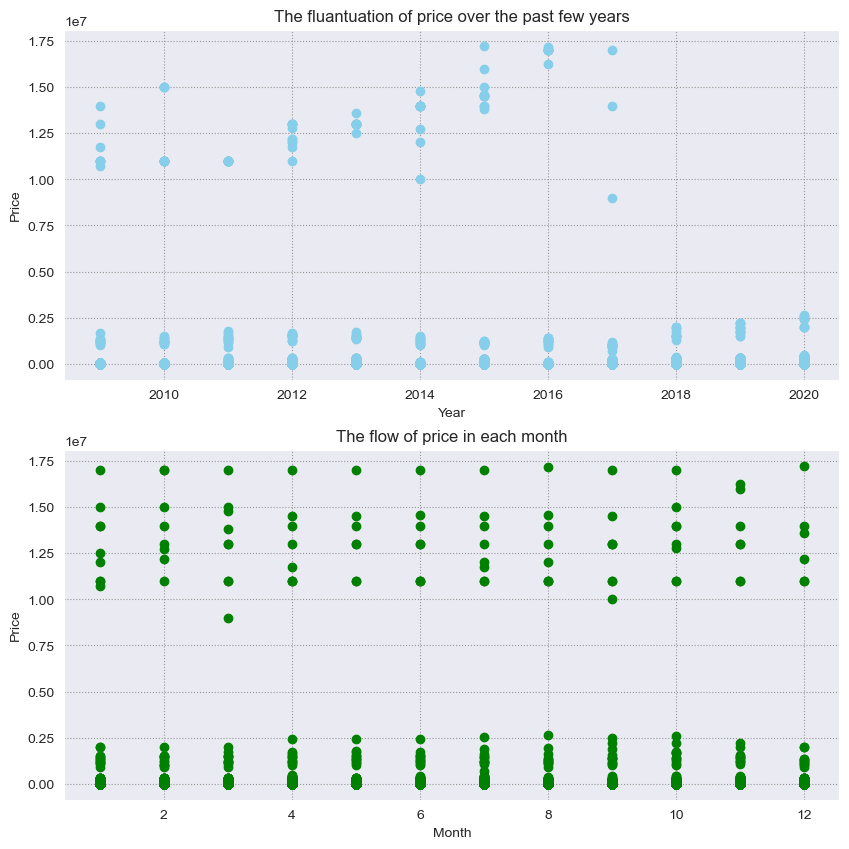

In [46]:
fig, (ax0,ax1) = plt.subplots(nrows= 2,
                              ncols= 1,
                              figsize= (10,10))
ax0.scatter(filtered_df['year'],
       filtered_df['price'],
       color = 'skyblue')
ax0.set(title= "The fluantuation of price over the past few years",
       xlabel = "Year",
       ylabel= "Price")

ax1.scatter(x= filtered_df['month'],
           y = filtered_df['price'],
           color = 'green')
ax1.set(title = "The flow of price in each month",
       xlabel= "Month",
       ylabel = "Price");

Note : In the fluantuation of price over the years there was an increasing from year 2011 to 2017 and the price falls between the year 2018 to 2020 in the First ax

In the second flow of price over each month from the January to Octomber the flow of price looks the same but at the month of November there is a short of price and in December in increased back.

In [50]:
Corr_py = african_df[['year','price']].corr()

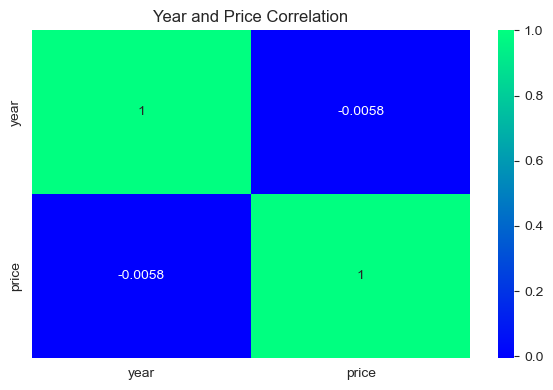

In [52]:
# displaying the relationship between the price and Year 
plt.figure(figsize=(6, 4))
sns.heatmap(Corr_py, annot=True, cmap='winter')
plt.title('Year and Price Correlation')
plt.tight_layout();